# Three Body Problem - Stable Orbits
Programmer: Owen Mikulski  (mikulski.12@buckeyemail.osu.edu)


The three body problem represents very real chaotic systems between three massive objects, typically stars or other such masses in space. Being chaotic, stable orbital solutions are hard to come by (and harder to code). My assumptions for the code are:

* The system is isolated from any other mass or field.
* The system contains point masses.
* The system functions under Newtonian mechanics.

To start, the basic principles of this problem arise out of Newton's equations for gravity. Specifically, here are the three separate equations of motion for three objects of mass $m_i$ :

$\begin{align}
    \mathbf{\ddot r_1} &= -Gm_2 \frac{\mathbf{r_1} - \mathbf{r_2}}{|\mathbf{r_1} - \mathbf{r_2}|^3} 
                            - Gm_3 \frac{\mathbf{r_1} - \mathbf{r_3}}{|\mathbf{r_1} - \mathbf{r_3}|^3} \;,  \\
    \mathbf{\ddot r_2} &= -Gm_3 \frac{\mathbf{r_2} - \mathbf{r_3}}{|\mathbf{r_2} - \mathbf{r_3}|^3} 
                            - Gm_1 \frac{\mathbf{r_2} - \mathbf{r_1}}{|\mathbf{r_2} - \mathbf{r_1}|^3} \;,  \\
    \mathbf{\ddot r_3} &= -Gm_1 \frac{\mathbf{r_3} - \mathbf{r_1}}{|\mathbf{r_3} - \mathbf{r_1}|^3} 
                            - Gm_2 \frac{\mathbf{r_3} - \mathbf{r_2}}{|\mathbf{r_3} - \mathbf{r_2}|^3} \;.  \\
\end{align}$

We can also represent this system using the Hamiltonian:

$\begin{align}
    H &= -\frac{Gm_1m_2}{|\mathbf{r_1} - \mathbf{r_2}|} - \frac{Gm_2m_3}{|\mathbf{r_3} - \mathbf{r_2}|} 
                                                        - \frac{Gm_3m_1}{|\mathbf{r_3} - \mathbf{r_1}|}
         + \frac{\mathbf{p_1}^2}{2m_1} + \frac{\mathbf{p_2}^2}{2m_2} + \frac{\mathbf{p_3}^2}{2m_3}
\end{align}$

where $H$ represents the total energy of the system. 

This code will exhibit several systems wherein the three body's follow a stable and periodic orbit, as well as offering the user the ability to change initial conditions such as mass, position, and velocity in order to observe chaotic portrayals of the problem, as well as hunt for their own solutions. 

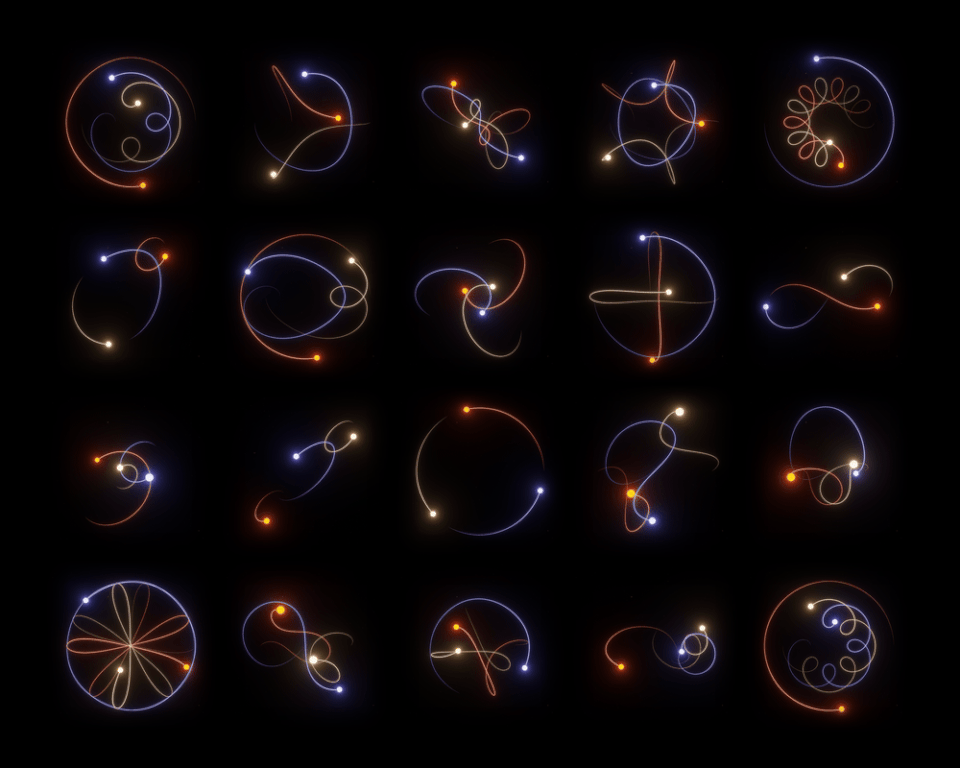


The above image is a static example of some 2-D stable orbits. The primary example I will try to code in will be centered around the figure-8 solution (I used ChatGPT to give me the initial conditions for this), but here are some links to articles with more initial condition configurations to play with!

* https://arxiv.org/pdf/1709.04775
* https://arxiv.org/pdf/1303.0181

In [35]:
%matplotlib inline

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import scipy as sci
import time

In [27]:
# Gravitational constant and masses
G = 1.0
m1 = 1.0
m2 = 1.0
m3 = 1.0

# Initial positions for a figure-8 solution in 2D
r1 = np.array([0.97000436, -0.24308753])
r2 = -r1
r3 = np.array([0.0, 0.0])

# Initial velocities for a figure-8 solution in 2D
v1 = np.array([0.4662036850, 0.4323657300])
v2 = v1
v3 = -2*v1

# Initial conditions from https://arxiv.org/pdf/1303.0181, just to give an example without having to change too much
rb1 = np.array([-1.0, 0.0])
rb2 = np.array([1.0, 0.0])
rb3 = np.array([0.0, 0.0])

vb1 = np.array([0.39295, 0.09758])
vb2 = vb1
vb3 = (-2.0 * vb1) / m3

# Combined vector
y0 = np.hstack([r1, r2, r3, v1, v2, v3])
s0 = np.hstack([rb1, rb2, rb3, vb1, vb2, vb3])

In [28]:
def hamiltonian_deriv(t, y):
    """ Returns the corresponding derivatives for the position and momentum
         vectors. 
    """
    r1, r2, r3 = y[0:2], y[2:4], y[4:6]
    p1, p2, p3 = y[6:8], y[8:10], y[10:12]

    # dr/dt = p/m
    dr1dt = p1 / m1
    dr2dt = p2 / m2
    dr3dt = p3 / m3

    # dp/dt = -dH/dr
    def grad_U(ri, rj, rk, mi, mj, mk):
        Fij = G * mi * mj * (ri - rj) / np.linalg.norm(ri - rj)**3
        Fik = G * mi * mk * (ri - rk) / np.linalg.norm(ri - rk)**3
        return - (Fij + Fik)

    dp1dt = grad_U(r1, r2, r3, m1, m2, m3)
    dp2dt = grad_U(r2, r1, r3, m2, m1, m3)
    dp3dt = grad_U(r3, r1, r2, m3, m1, m2)

    return np.concatenate([dr1dt, dr2dt, dr3dt, dp1dt, dp2dt, dp3dt])

In [29]:
t_span = (0, 20)  # 6.3259 for y0. 20 for s0.
t_eval = np.linspace(*t_span, 1000)

# can change the y0 between y0 and s0
sol = solve_ivp(hamiltonian_deriv, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Extract positions
r1s = sol.y[0:2].T
r2s = sol.y[2:4].T
r3s = sol.y[4:6].T

Below is some code to show each $x$ and $y$ component of each position vector $r$ as a function of time.

In [30]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

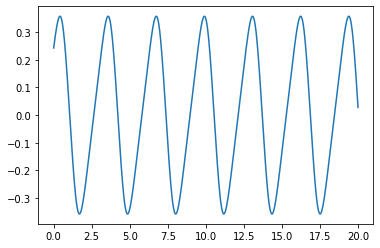

In [31]:
plt.plot(t, y2)

## Plot of motion

Below is one such plot for motion, which saves the gif of the motion under "threebody1.gif".

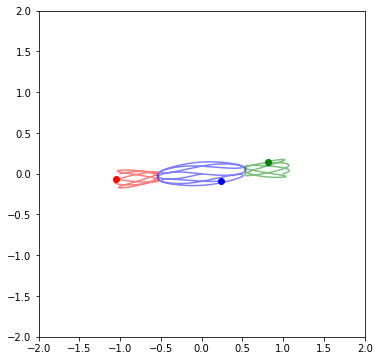

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

line1, = ax.plot([], [], 'ro-')
line2, = ax.plot([], [], 'go-')
line3, = ax.plot([], [], 'bo-')

trail1, = ax.plot([], [], 'r', alpha=0.5)
trail2, = ax.plot([], [], 'g', alpha=0.5)
trail3, = ax.plot([], [], 'b', alpha=0.5)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3, trail1, trail2, trail3

def update(i):
    x1, y1 = r1s[i]
    x2, y2 = r2s[i]
    x3, y3 = r3s[i]

    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    line3.set_data(x3, y3)
    
    trail1.set_data(r1s[:i, 0], r1s[:i, 1])
    trail2.set_data(r2s[:i, 0], r2s[:i, 1])
    trail3.set_data(r3s[:i, 0], r3s[:i, 1])
    
    return line1, line2, line3, trail1, trail2, trail3

ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True, interval=20)
ani.save('threebody1.gif',writer='pillow',fps=30)
plt.show()

## Phase Space

The below code highlight some phase space plots for the motion as well, which we can use to see if the motion is truly periodic or if it's simply chaos. 

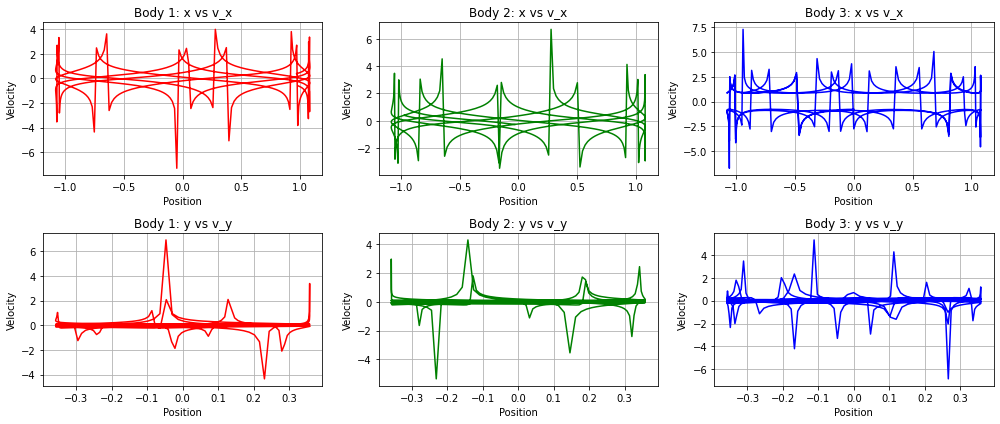

In [34]:
# Extract momenta from solution. NOTE: since sol.y[6:12].T represents the momentum, 
#  we have to divide by the respective masses
v1s = sol.y[6:8].T / m1
v2s = sol.y[8:10].T / m2
v3s = sol.y[10:12].T / m3

# Set up the figure
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

# Body 1
axs[0, 0].plot(r1s[:, 0], p1s[:, 0], color='r')
axs[0, 0].set_title("Body 1: x vs v_x")
axs[1, 0].plot(r1s[:, 1], p1s[:, 1], color='r')
axs[1, 0].set_title("Body 1: y vs v_y")

# Body 2
axs[0, 1].plot(r2s[:, 0], p2s[:, 0], color='g')
axs[0, 1].set_title("Body 2: x vs v_x")
axs[1, 1].plot(r2s[:, 1], p2s[:, 1], color='g')
axs[1, 1].set_title("Body 2: y vs v_y")

# Body 3
axs[0, 2].plot(r3s[:, 0], p3s[:, 0], color='b')
axs[0, 2].set_title("Body 3: x vs v_x")
axs[1, 2].plot(r3s[:, 1], p3s[:, 1], color='b')
axs[1, 2].set_title("Body 3: y vs v_y")

for ax in axs.flat:
    ax.set_xlabel("Position")
    ax.set_ylabel("Velocity")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Animation plot 2

The below animation code is from the following github:
* https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid10.ipynb

and highlights another way to animate that I thought looked cool. This github is also where I found the two papers underlined in the introduction!

In [22]:
tt = 1/np.sqrt(6.67e-11 * 1.99e30 / (1.5e11)**3 ) # seconds
tt = tt / (60*60 * 24* 365.25) * np.diff(t)[0] # per time step (in years)

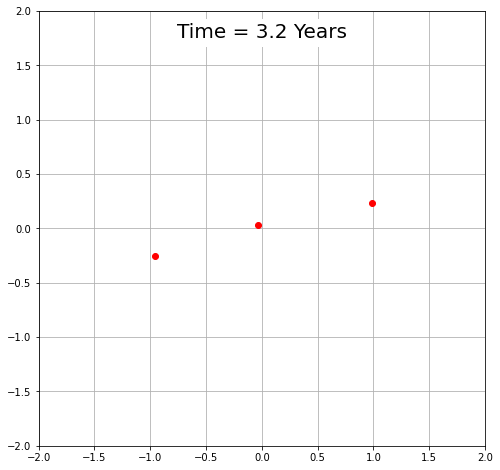

In [23]:
def animate(i):
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    text.set_text('Time = {:.1f} Years'.format(i*tt))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro', lw=3, markersize=6)
text = plt.text(0, 1.75, 'asdasd', fontsize=20, backgroundcolor='white', ha='center')
ax.set_ylim(-2, 2)
ax.set_xlim(-2,2)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('threebody2.gif',writer='pillow',fps=30)

## 3-D Animation

The below code is not mine, I couldn't figure out how to plot in 3-D in time, but is from: 

* https://github.com/Younes-Toumi/Youtube-Channel/blob/main/Simulation%20with%20Python/3%20Body%20Problem/main.ipynb

I thought the code looked nice and it produced a plot of the resulting motion in 3-D. I wanted to include it to show that there are ways to plot the motion in 3-D as well. 

In [35]:
m1 = 1.0
m2 = 1.0
m3 = 1.0

# Initial positions for figure-8 solution
ri_1 =  [0.97000436, -0.24308753, 0.0]
ri_2 =  [-0.97000436, -0.24308753, 0.0]
ri_3 =  [0.0, 0.0, 0.0]

# Initial velocities for a figure-8 solution
vi_1 =  [0.4662036850, 0.4323657300, 0.0]
vi_2 =  [0.4662036850, 0.4323657300, 0.0]
vi_3 =  [-2*0.4662036850, -2*0.4323657300, 0.0]

initial_conditions = np.array([
    ri_1, ri_2, ri_3,
    vi_1, vi_2, vi_3
]).ravel()

In [36]:
def system_odes(t, S, m1, m2, m3):
    p1, p2, p3 = S[0:3], S[3:6], S[6:9]
    dp1_dt, dp2_dt, dp3_dt = S[9:12], S[12:15], S[15:18]

    f1, f2, f3 = dp1_dt, dp2_dt, dp3_dt

    df1_dt = m3*(p3 - p1)/np.linalg.norm(p3 - p1)**3 + m2*(p2 - p1)/np.linalg.norm(p2 - p1)**3
    df2_dt = m3*(p3 - p2)/np.linalg.norm(p3 - p2)**3 + m1*(p1 - p2)/np.linalg.norm(p1 - p2)**3
    df3_dt = m1*(p1 - p3)/np.linalg.norm(p1 - p3)**3 + m2*(p2 - p3)/np.linalg.norm(p2 - p3)**3

    return np.array([f1, f2, f3, df1_dt, df2_dt, df3_dt]).ravel()

In [37]:
time_s, time_e = 0, 10
t_points = np.linspace(time_s, time_e, 1001)

solution = solve_ivp(
    fun=system_odes,
    t_span=(time_s, time_e),
    y0=initial_conditions,
    t_eval=t_points,
    args=(m1, m2, m3)
)


t_sol = solution.t
p1x_sol = solution.y[0]
p1y_sol = solution.y[1]
p1z_sol = solution.y[2]

p2x_sol = solution.y[3]
p2y_sol = solution.y[4]
p2z_sol = solution.y[5]

p3x_sol = solution.y[6]
p3y_sol = solution.y[7]
p3z_sol = solution.y[8]

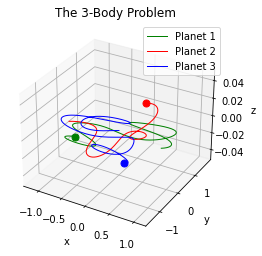

In [38]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

planet1_plt = ax.plot(p1x_sol, p1y_sol, p1z_sol, 'green', label='Planet 1', linewidth=1)
planet2_plt = ax.plot(p2x_sol, p2y_sol, p2z_sol, 'red', label='Planet 2', linewidth=1)
planet3_plt = ax.plot(p3x_sol, p3y_sol, p3z_sol, 'blue',label='Planet 3', linewidth=1)

planet1_dot = ax.plot([p1x_sol[-1]], [p1y_sol[-1]], [p1z_sol[-1]], 'o', color='green', markersize=7)
planet2_dot = ax.plot([p2x_sol[-1]], [p2y_sol[-1]], [p2z_sol[-1]], 'o', color='red', markersize=7)
planet3_dot = ax.plot([p3x_sol[-1]], [p3y_sol[-1]], [p3z_sol[-1]], 'o', color='blue', markersize=7)


ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()